## Importing libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv')




Attribute Information:


age: Age of the patient

sex: Gender of the patient (0 = Female, 1 = Male)

cp: Type of chest pain (values 0-3)

trestbps: Resting Blood Pressure

chol: Serum Cholesterol level in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)

restecg: Results of electrocardiographic test (values 0-2)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (0 = No, 1 = Yes)

oldpeak: ST depression induced by exercise relative to rest

slope: Slope of the peak exercise ST segment (values 0-2)

ca: Number of major vessels colored by fluoroscopy (values 0-3)

thal: Thallium stress test result (values 0,1,2) 0 = normal , 1 = fixed detect , 2 = reversable detect

target: 0=less chance of heart disease and 1= more chance of heart disease

In [154]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Analyizing the data set

In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [155]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [156]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

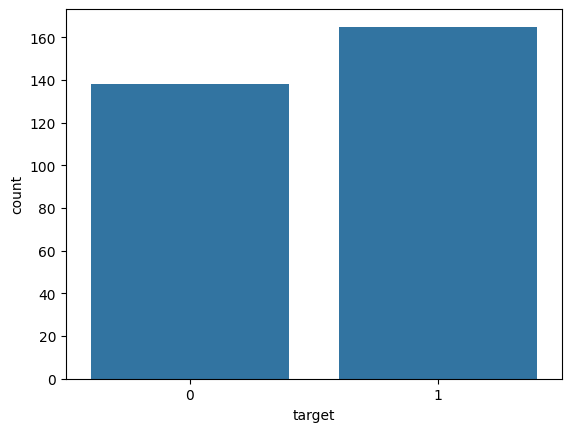

In [157]:
sns.countplot(x='target',data=dataset)

<AxesSubplot: >

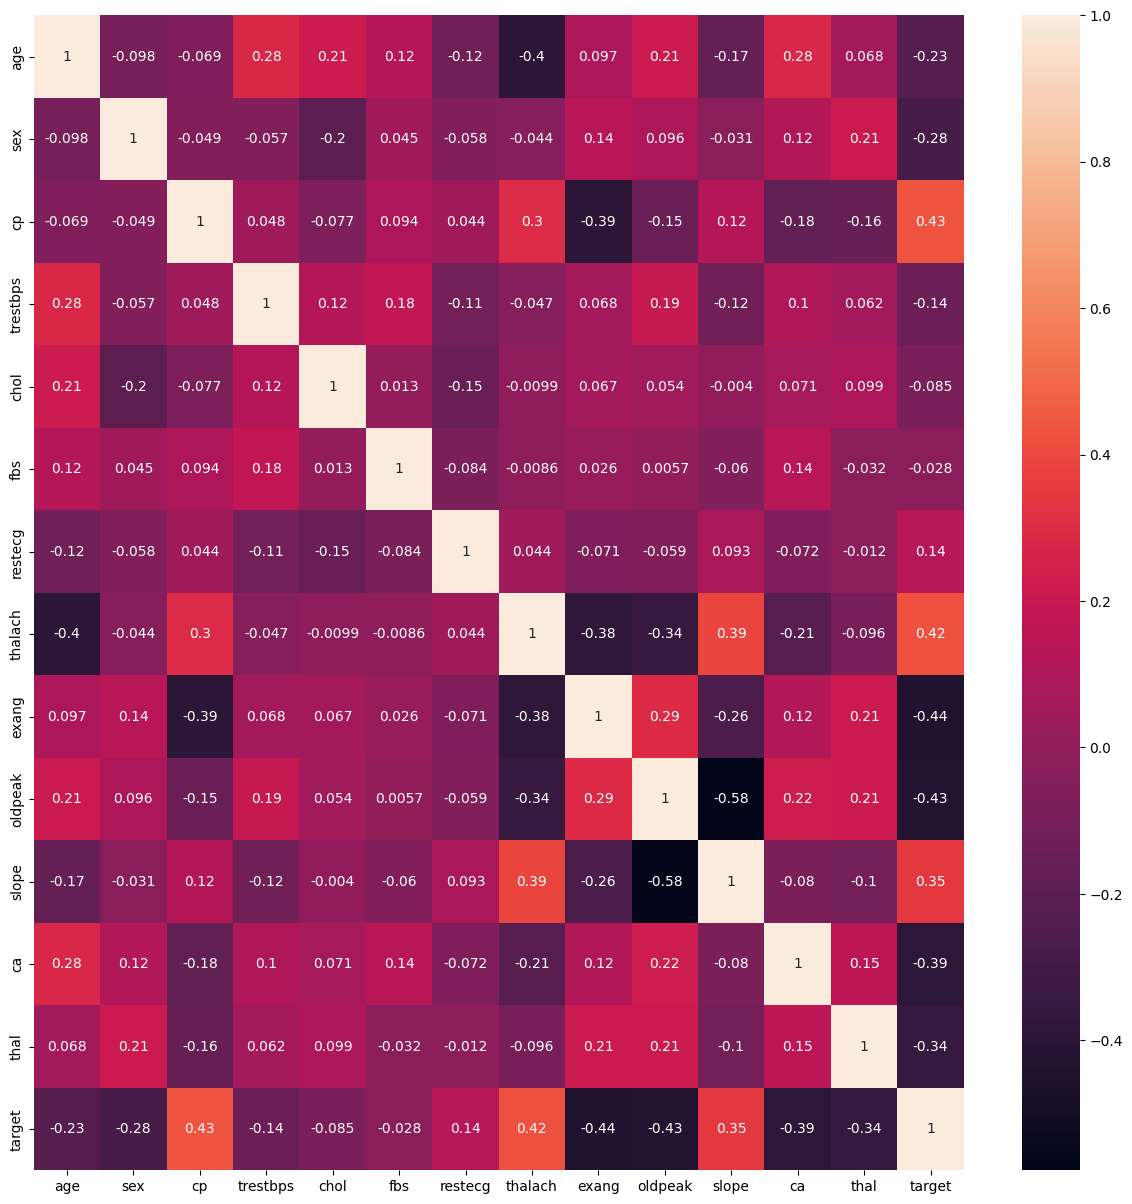

In [158]:
corr_mat=dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,annot=True)

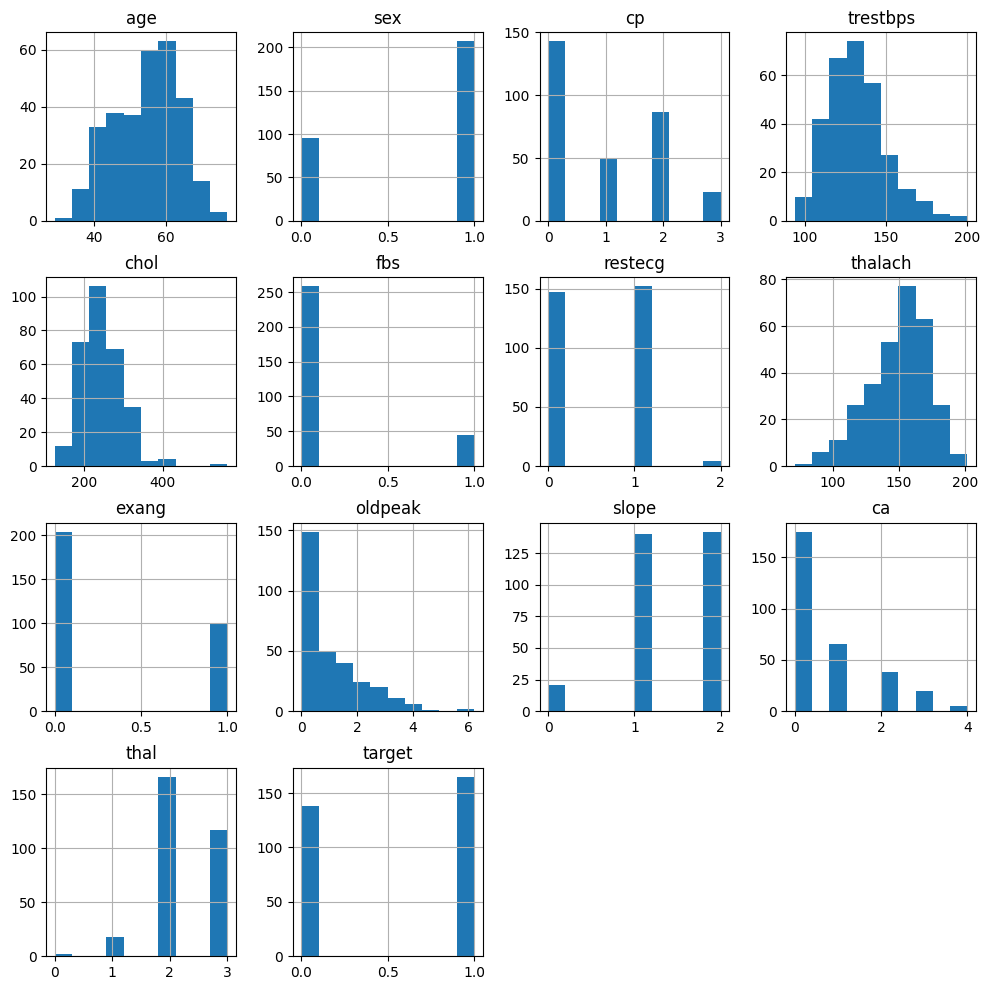

In [159]:
#plot histograms for each column

dataset.hist(figsize=(12,12))
plt.show()

Convert some categorical variables to dummy variables

In [160]:
dataset2=pd.get_dummies(dataset,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [161]:
dataset2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [162]:
cols=['cp_0','cp_1','cp_2','cp_3','trestbps','chol','fbs_0','fbs_1','restecg_0','restecg_1','restecg_2','thalach','exang_0','exang_1']



In [163]:
x=dataset2[cols]
y=dataset2.target

In [164]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### No data preprocessing is required,all values are of type int64

In [165]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [166]:
x_train.shape

(227, 14)

In [167]:
x_test.shape

(76, 14)

In [168]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [169]:
x_train

array([[-0.91139737,  2.34216018, -0.6815542 , ...,  0.63335882,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ..., -0.69663611,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  0.58902565,
         0.6815542 , -0.6815542 ],
       ...,
       [-0.91139737, -0.42695628, -0.6815542 , ..., -0.8296356 ,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.25330447,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  1.29835628,
         0.6815542 , -0.6815542 ]])

# Model Training : Random Forest

Classification using random forest classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

In [172]:
x_test

array([[ 0.9486833 , -0.4958847 , -0.4958847 , ..., -1.57537146,
        -1.34715063,  1.34715063],
       [-1.05409255, -0.4958847 , -0.4958847 , ...,  0.40186918,
         0.74230749, -0.74230749],
       [-1.05409255, -0.4958847 ,  2.01659779, ...,  0.99083447,
         0.74230749, -0.74230749],
       ...,
       [ 0.9486833 , -0.4958847 , -0.4958847 , ...,  1.53773082,
         0.74230749, -0.74230749],
       [ 0.9486833 , -0.4958847 , -0.4958847 , ..., -0.73399247,
         0.74230749, -0.74230749],
       [-1.05409255,  2.01659779, -0.4958847 , ...,  0.23359338,
         0.74230749, -0.74230749]])

In [173]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

<AxesSubplot: >

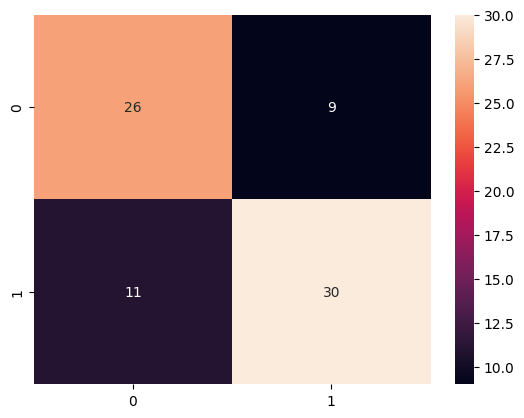

In [174]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)


In [175]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7368421052631579

In [176]:
import pickle
pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))